# Classification - Decision Tree - Major Occupation

Now we try a Decision Tree Classifier from sklearn on the same Internat Usage Major Occupation data. The same interface is used as the k-nearest-networks classifier.

Again, we separate the data into training and test data.

In [5]:
# Import feature subset with Major_Occupation Column and one hot encoded values

from sklearn import neighbors, datasets
import pandas as pd
import pylab as pl
import numpy as np
from matplotlib.colors import ListedColormap
import itertools
import re, string
import sys
sys.path.append('../resources')
from w6support import plot_2d_class
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

originalDF = pd.read_csv('occupationFeatureSubset.csv')
dfOHE = pd.read_csv('oheTransformedData.csv')
dfOHE['Major_Occupation'] = pd.Series(originalDF['Major_Occupation'], index=dfOHE.index)
dfOHE.fillna(0, inplace=True)

# Next we check the Major_Occupation options in the dataset for use with classification
print(dfOHE.Major_Occupation.unique())

# Now we replace those values with integers for use with the classification algorithm
occupation_values = {"Major_Occupation": {"Professional": 1, "Education": 2, "Computer": 3, "Other": 4, "Management": 5}}
dfOHE.replace(occupation_values, inplace=True)

X, y = dfOHE.loc[:, dfOHE.columns != 'Major_Occupation'], dfOHE['Major_Occupation']

predNames = list(dfOHE.columns[dfOHE.columns != 'Major_Occupation'])

['Professional' 'Education' 'Computer' 'Other' 'Management']


In [6]:
from sklearn.model_selection import train_test_split
Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, test_size=0.2, stratify=y)

from sklearn.tree import DecisionTreeClassifier

# Derive Xtrain2, which is the 
XtrainDf = pd.DataFrame(data=Xtrain, columns=predNames)
c1 = 'Age'
c2 = 'Not_Purchasing_Prefer_people'
colNames = [c1, c2]
Xtrain2 = XtrainDf[colNames]
nTrain = Xtrain2.shape[0]

XtestDf = pd.DataFrame(data=Xtest, columns=predNames)
Xtest2 = XtestDf[colNames]
Xcombined2 = pd.concat([Xtrain2, Xtest2])
ycombined = np.hstack((ytrain, ytest))


We also look at comparing different decision trees to the `Age` $\times$ `Not_Purchasing_Prefer_people` data, based on the following conditions

1. maximum tree depth (2,3,4,5)
2. choice of tree impurity algorithm (`gini` or `entropy`)

which is 8 combinations in all.

Plotting pic/depth_2_gini_decisionTree_Occupation_Age_Notpurchasingpreferpeople.pdf
0.3570722057368942
[[383  10   0  40   0]
 [201 258   0   9   0]
 [380  23   0  14   0]
 [365  22   0  81   0]
 [212   4   0  20   0]]
              precision    recall  f1-score   support

           1      0.249     0.885     0.388       433
           2      0.814     0.551     0.657       468
           3      0.000     0.000     0.000       417
           4      0.494     0.173     0.256       468
           5      0.000     0.000     0.000       236

   micro avg      0.357     0.357     0.357      2022
   macro avg      0.311     0.322     0.260      2022
weighted avg      0.356     0.357     0.295      2022

Plotting pic/depth_2_entropy_decisionTree_Occupation_Age_Notpurchasingpreferpeople.pdf


/Users/annadowling/miniconda3/envs/py3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


0.36350148367952523
[[375  24   0  34   0]
 [175 284   0   9   0]
 [370  39   0   8   0]
 [351  41   0  76   0]
 [210  12   0  14   0]]
              precision    recall  f1-score   support

           1      0.253     0.866     0.392       433
           2      0.710     0.607     0.654       468
           3      0.000     0.000     0.000       417
           4      0.539     0.162     0.250       468
           5      0.000     0.000     0.000       236

   micro avg      0.364     0.364     0.364      2022
   macro avg      0.300     0.327     0.259      2022
weighted avg      0.343     0.364     0.293      2022

Plotting pic/depth_3_gini_decisionTree_Occupation_Age_Notpurchasingpreferpeople.pdf


/Users/annadowling/miniconda3/envs/py3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


0.37487636003956476
[[322  10  61  40   0]
 [122 258  79   9   0]
 [283  23  97  14   0]
 [306  22  59  81   0]
 [189   4  23  20   0]]
              precision    recall  f1-score   support

           1      0.264     0.744     0.389       433
           2      0.814     0.551     0.657       468
           3      0.304     0.233     0.264       417
           4      0.494     0.173     0.256       468
           5      0.000     0.000     0.000       236

   micro avg      0.375     0.375     0.375      2022
   macro avg      0.375     0.340     0.313      2022
weighted avg      0.422     0.375     0.349      2022

Plotting pic/depth_3_entropy_decisionTree_Occupation_Age_Notpurchasingpreferpeople.pdf


/Users/annadowling/miniconda3/envs/py3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


0.3887240356083086
[[309  18  66  40   0]
 [109 284  66   9   0]
 [258  33 112  14   0]
 [293  36  58  81   0]
 [183   6  27  20   0]]
              precision    recall  f1-score   support

           1      0.268     0.714     0.390       433
           2      0.753     0.607     0.672       468
           3      0.340     0.269     0.300       417
           4      0.494     0.173     0.256       468
           5      0.000     0.000     0.000       236

   micro avg      0.389     0.389     0.389      2022
   macro avg      0.371     0.352     0.324      2022
weighted avg      0.416     0.389     0.360      2022

Plotting pic/depth_4_gini_decisionTree_Occupation_Age_Notpurchasingpreferpeople.pdf


/Users/annadowling/miniconda3/envs/py3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


0.39416419386745793
[[  0  18 264 151   0]
 [  0 284 129  55   0]
 [  0  34 309  74   0]
 [  0  36 228 204   0]
 [  0   6 141  89   0]]
              precision    recall  f1-score   support

           1      0.000     0.000     0.000       433
           2      0.751     0.607     0.671       468
           3      0.289     0.741     0.415       417
           4      0.356     0.436     0.392       468
           5      0.000     0.000     0.000       236

   micro avg      0.394     0.394     0.394      2022
   macro avg      0.279     0.357     0.296      2022
weighted avg      0.316     0.394     0.332      2022

Plotting pic/depth_4_entropy_decisionTree_Occupation_Age_Notpurchasingpreferpeople.pdf


/Users/annadowling/miniconda3/envs/py3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


0.39416419386745793
[[  0  18 264 151   0]
 [  0 284 129  55   0]
 [  0  33 309  75   0]
 [  0  36 228 204   0]
 [  0   6 141  89   0]]
              precision    recall  f1-score   support

           1      0.000     0.000     0.000       433
           2      0.753     0.607     0.672       468
           3      0.289     0.741     0.415       417
           4      0.355     0.436     0.392       468
           5      0.000     0.000     0.000       236

   micro avg      0.394     0.394     0.394      2022
   macro avg      0.279     0.357     0.296      2022
weighted avg      0.316     0.394     0.332      2022

Plotting pic/depth_5_gini_decisionTree_Occupation_Age_Notpurchasingpreferpeople.pdf


/Users/annadowling/miniconda3/envs/py3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


0.3877349159248269
[[ 29  18 264 122   0]
 [ 20 284 129  35   0]
 [ 26  34 309  48   0]
 [ 42  36 228 162   0]
 [ 25   6 141  64   0]]
              precision    recall  f1-score   support

           1      0.204     0.067     0.101       433
           2      0.751     0.607     0.671       468
           3      0.289     0.741     0.415       417
           4      0.376     0.346     0.360       468
           5      0.000     0.000     0.000       236

   micro avg      0.388     0.388     0.388      2022
   macro avg      0.324     0.352     0.310      2022
weighted avg      0.364     0.388     0.346      2022

Plotting pic/depth_5_entropy_decisionTree_Occupation_Age_Notpurchasingpreferpeople.pdf


/Users/annadowling/miniconda3/envs/py3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


0.38328387734915925
[[ 41  18 252 122   0]
 [ 32 284 117  35   0]
 [ 47  34 288  48   0]
 [ 54  36 216 162   0]
 [ 30   6 136  64   0]]
              precision    recall  f1-score   support

           1      0.201     0.095     0.129       433
           2      0.751     0.607     0.671       468
           3      0.285     0.691     0.404       417
           4      0.376     0.346     0.360       468
           5      0.000     0.000     0.000       236

   micro avg      0.383     0.383     0.383      2022
   macro avg      0.323     0.348     0.313      2022
weighted avg      0.363     0.383     0.350      2022



/Users/annadowling/miniconda3/envs/py3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


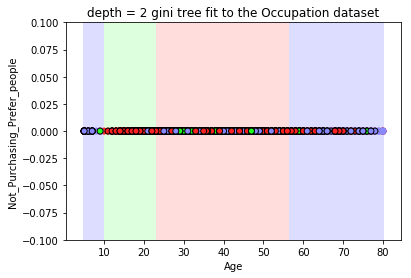

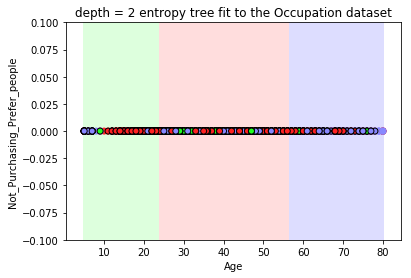

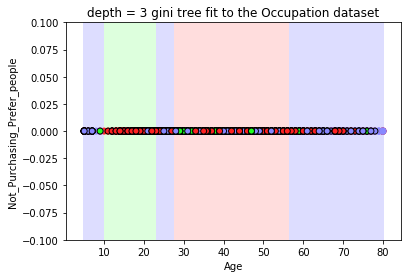

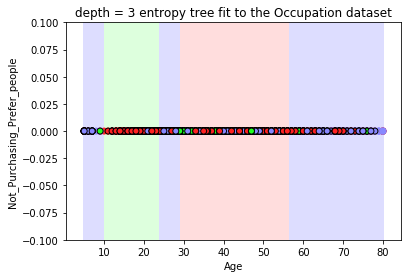

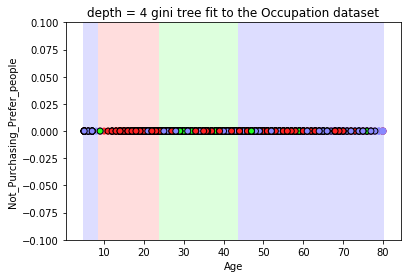

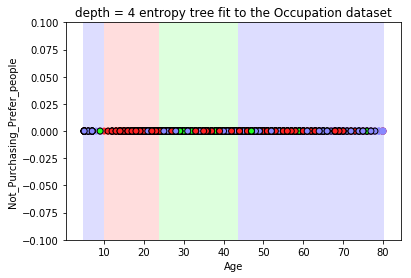

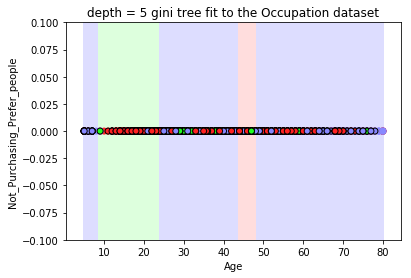

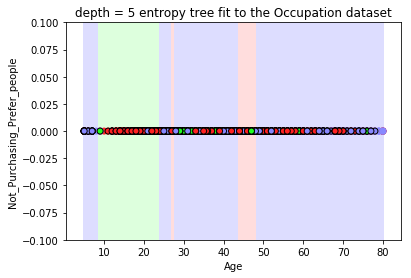

In [9]:
# Create color maps for 3-class classification problem
cmap_light = ListedColormap(['#FFDDDD', '#DDFFDD', '#DDDDFF'])
cmap_bold = ListedColormap(['#FF2222', '#22FF22', '#8888FF'])

pattern = re.compile('[\W_]+', re.UNICODE)

c1 = pattern.sub("",c1.title()) # Make titlecase, then remove non-alphanumeric characters
c2 = pattern.sub("",c2.title())

for treeDepth in range(2,6):
  for criterion in ["gini","entropy"]:
    tree = DecisionTreeClassifier(criterion=criterion, max_depth=treeDepth, random_state=0)
    tree2 = DecisionTreeClassifier(criterion=criterion, max_depth=treeDepth, random_state=0)

    tree2.fit(Xtrain2, ytrain)

    plotTitle = "depth = %i %s %s fit to the %s dataset" % (treeDepth, criterion, "tree", "Occupation")
    fileTitle = "pic/depth_%i_%s_%s_%s_%s_%s.pdf" % (treeDepth, criterion, "decisionTree", "Occupation", c1, c2)

    print("Plotting "+fileTitle)
    plot_2d_class(Xcombined2, ycombined, nTrain, tree2, plotTitle, fileTitle, cmap_light, cmap_bold)

    ytree2 = tree2.predict(Xtest2)
    print(accuracy_score(ytest, ytree2))
    print(confusion_matrix(ytest, ytree2))
    print(classification_report(ytest, ytree2, digits=3))

We include all features below

In [19]:
criterion = "entropy"
treeDepth = 8
tree = DecisionTreeClassifier(criterion=criterion, max_depth=treeDepth, random_state=0)
tree.fit(Xtrain, ytrain)
y_treeTest = tree.predict(Xtest)
print(accuracy_score(ytest, y_treeTest))
print(confusion_matrix(ytest, y_treeTest))
print(classification_report(ytest, y_treeTest, digits=3))

0.4520276953511375
[[ 86  31 130 181   5]
 [ 45 284  86  53   0]
 [ 60  46 251  54   6]
 [ 66  41  70 290   1]
 [ 64   7  72  90   3]]
              precision    recall  f1-score   support

           1      0.268     0.199     0.228       433
           2      0.694     0.607     0.648       468
           3      0.412     0.602     0.489       417
           4      0.434     0.620     0.511       468
           5      0.200     0.013     0.024       236

   micro avg      0.452     0.452     0.452      2022
   macro avg      0.402     0.408     0.380      2022
weighted avg      0.427     0.452     0.421      2022



One of the main advantages of decision trees is the fact that they provide easily interpreted models for prediction. Indeed, the rules encoded in the tree can help to understand how the predictors combine and contribute to explaining the classification. As such, decision trees are often described as _white box_, where other algorithms (in particular, neural networks) are best seen as _black box_.

To aid interpretation, `scikit-learn` can output the model in a graph description language such as [dot](https://www.graphviz.org/pdf/dotguide.pdf) using the `export_graphviz` method. If you wish, you can export the `dot` file and process it using tools, both command line such as [dotty](https://www.graphviz.org/pdf/dottyguide.pdf) and more general tools such as those listed [here](https://en.wikipedia.org/wiki/Graphviz). However, it is probably more convenient to use a `dot` postprocessor (`pydotplus`) directly from within the notebook to create an object that can be displayed in the notebook, or saved to a file as below.

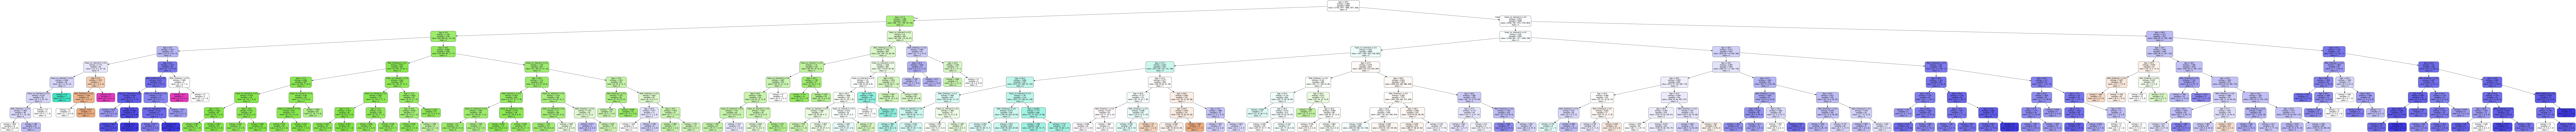

True

In [23]:
from IPython.display import Image
from IPython.display import display
import pydotplus
from sklearn.tree import export_graphviz
        
dot_data = export_graphviz(
    tree, 
    out_file=None,
    feature_names=predNames,  
    # the parameters below are new in sklearn 0.18
    class_names=['1', '2', '3', '4', '5'],  
    filled=True,
    rounded=True)

graph = pydotplus.graph_from_dot_data(dot_data)
display(Image(graph.create_png()))
graph.write_pdf("pic/tree.pdf")
